In [1]:
!pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 71.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.12.0
    Uninstalling huggingface-hub-0.12.0:
      Successfully uninstalled huggingface-hub-0.12.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.3
    Uninstalling transformers-4.21.3:
      Successfully uninstalled transformers-4.21.3


In [9]:
!pip install datasets
!pip install soundfile
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 90.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 36.3 MB/s eta 0:00:0000:0100:01
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23702 sha256=f1c506f912082ce785b21e7020bc6992249d106c84407351e74898684d182ae8
  Stored in directory: /root/.cache/pip/wheels/7a/6a/b0/92760a6d6bc2bff5464970af910c0b0b921390993f3199cdf7
Successfully built audioread


In [3]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-89k1tdzw
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-89k1tdzw
  Resolved https://github.com/huggingface/transformers to commit 2489e380e45177eb3da108366f65b8108b2815c5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7344228 sha256=66e2bc3b1f6a532312638ba5c10adbad6ee3eae1e028e20356dc0424dcd1e16a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ewe0kxcf/wheels/14/a0/7b/8f6b25ba4110aa215fcb8d6aedd6cd4f9b9b6619190999ac2b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.30.2
    Uninstalling transformers-4.30.2:
      Successfully uninstalled transformers-4.30.2


In [4]:
!pip install speechbrain accelerate

In [5]:
!apt-get install git-lfs
!git lfs install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 3 not upgraded.
Need to get 3316 kB of archives.
After this operation, 11.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 git-lfs amd64 2.9.2-1 [3316 kB]
Fetched 3316 kB in 1s (3542 kB/s) 
Selecting previously unselected package git-lfs.
(Reading database ... 69943 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.9.2-1_amd64.deb ...
Unpacking git-lfs (2.9.2-1) ...
Setting up git-lfs (2.9.2-1) ...
Processing triggers for man-db (2.9.1-1) ...
Updated git hooks.
Git LFS initialized.


In [6]:
!pip install wandb --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: wandb
    Found existing installation: wandb 0.13.4
    Uninstalling wandb-0.13.4:
      Successfully uninstalled wandb-0.13.4


## Fine-tuning SpeechT5


### Housekeeping

In [7]:
from huggingface_hub import notebook_login

notebook_login()

### The dataset

In [172]:
from datasets import load_dataset, Audio

dataset = load_dataset("facebook/voxpopuli", "es", split="train")

Reusing dataset voxpopuli (/root/.cache/huggingface/datasets/facebook___voxpopuli/es/1.3.0/b5ff837284f0778eefe0f642734e142d8c3f574eba8c9c8a4b13602297f73604)


In [173]:
len(dataset)

50922

In [174]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

### Preprocessing the data

In [175]:
from transformers import SpeechT5Processor
checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

#### Text cleanup for SpeechT5 tokenization

In [176]:
tokenizer = processor.tokenizer

In [177]:
dataset[0]

{'audio_id': '20200914-0900-PLENARY-es_20200914-17:23:57_4',
 'language': 3,
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/2fb3261dbf9ef7ba9a3acf70075ebdad88b9ffa07a75f71f1ba5635e36443a6d/train_part_0/20200914-0900-PLENARY-es_20200914-17:23:57_4.wav',
  'array': array([ 0.00064087,  0.00039673, -0.00048828, ...,  0.00619507,
         -0.00012207, -0.00494385], dtype=float32),
  'sampling_rate': 16000},
 'raw_text': 'Y, desde luego, esa razón no puede tener que ver con la explicación surrealista que hemos escuchado más de una vez de que se trata de una conspiración izquierdista.',
 'normalized_text': 'y desde luego esa razón no puede tener que ver con la explicación surrealista que hemos escuchado más de una vez de que se trata de una conspiración izquierdista.',
 'gender': 'male',
 'speaker_id': '96812',
 'is_gold_transcript': True,
 'accent': 'None'}

In [178]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab":[vocab], "all_text": [all_text]}

In [179]:
vocabs = dataset.map(extract_all_chars, batched=True, batch_size=-1, keep_in_memory=True, remove_columns=dataset.column_names)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [180]:
dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

In [181]:
tokenizer_vocab

{'!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '</s>',
 '<ctc_blank>',
 '<mask>',
 '<pad>',
 '<s>',
 '<unk>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 'æ',
 'é',
 'ê',
 'œ',
 '̄',
 '—',
 '▁'}

In [182]:
# identify all special characters that tokenizer does not contain
dataset_vocab - tokenizer_vocab

{' ', '1', 'á', 'í', 'ñ', 'ó', 'ú', 'ü'}

In [183]:
replacements= [
    ('á', 'a'),
    ('í', 'i'),
    ('ñ', 'n'),
    ('ó', 'o'),
    ('ú', 'u'),
    ('ü', 'u'), 
    
]

In [184]:
# replace special characters
def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)
    

Loading cached processed dataset at /root/.cache/huggingface/datasets/facebook___voxpopuli/es/1.3.0/b5ff837284f0778eefe0f642734e142d8c3f574eba8c9c8a4b13602297f73604/cache-cd237bcae5918bae.arrow


In [185]:
len(dataset)

50922

#### Speakers

In [186]:
from collections import defaultdict
speaker_counts = defaultdict(int)
for speaker_id in dataset["speaker_id"]:
    speaker_counts[speaker_id] += 1
    

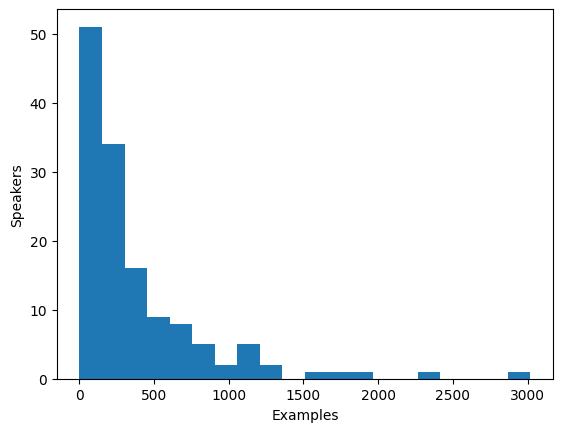

In [187]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

In [188]:
# balance dataset by limiting speakers to middle
def select_speaker(speaker_id):
    return 50 <= speaker_counts[speaker_id] <= 700
dataset = dataset.filter(select_speaker, input_columns=["speaker_id"])

Loading cached processed dataset at /root/.cache/huggingface/datasets/facebook___voxpopuli/es/1.3.0/b5ff837284f0778eefe0f642734e142d8c3f574eba8c9c8a4b13602297f73604/cache-f0d45b3ceea70178.arrow


In [189]:
len(set(dataset["speaker_id"]))

96

In [190]:
len(dataset)

24459

#### Speaker embeddings

In [191]:
# needed to differentiate between multiple speakers
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"
device = "cuda"
speaker_model = EncoderClassifier.from_hparams(source=spk_model_name, run_opts={"device":device}, savedir=os.path.join("/tmp", spk_model_name))

In [192]:
def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

#### Processing the dataset

In [193]:
def prepare_dataset(example):
    audio = example["audio"]
    example = processor(text=example["normalized_text"], audio_target=audio["array"], sampling_rate=audio["sampling_rate"], return_attention_mask=False)
    # strip off batch dimension
    example["labels"] = example["labels"][0]
    
    #use SpeechBrain to get x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])
    return example

In [194]:
# test with one example
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [195]:
# check embeddings shape
processed_example["speaker_embeddings"].shape

(512,)

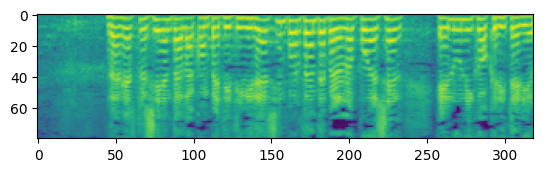

In [196]:
# check labels is log-mel spectrogram with 80 bins
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [200]:
len(dataset)

24459

In [201]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names, num_proc=1)
dataset

  0%|          | 0/24459 [00:00<?, ?ex/s]

Dataset({
    features: ['input_ids', 'labels', 'speaker_embeddings'],
    num_rows: 24459
})

In [202]:
dataset.column_names

['input_ids', 'labels', 'speaker_embeddings']

In [203]:
from collections import defaultdict
lengths = defaultdict(int)
for input_id in dataset["input_ids"]:
    lengths[len(input_id)] += 1

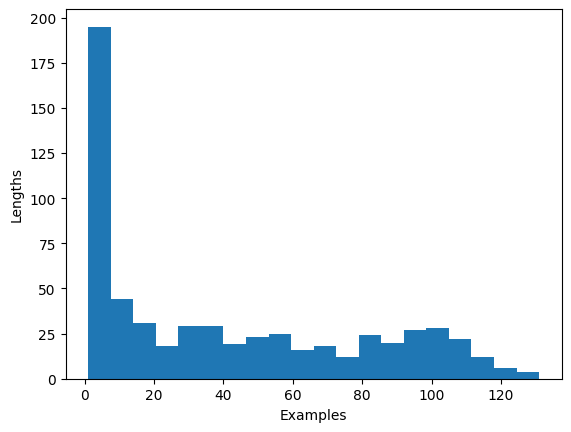

In [204]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(lengths.values(), bins=20)
plt.ylabel("Lengths")
plt.xlabel("Examples")
plt.show()

In [205]:
len(dataset)

24459

In [206]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 400
dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

  0%|          | 0/25 [00:00<?, ?ba/s]

23745

In [207]:
len(dataset)

23745

In [208]:
dataset = dataset.train_test_split(test_size=0.1)

#### Data collator

In [209]:
# to combine multiple examples into a batch, you need to define a custom data collator. 
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [210]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

### Train the model

In [211]:
from transformers import SpeechT5ForTextToSpeech
model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

In [212]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [118]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [213]:
wandb.init(project="huggingface-audio-course-unit6-handson", resume=True)

train/epoch,▁
train/global_step,▁
train/learning_rate,▁
train/loss,▁
train/epoch,0.07
train/global_step,25
train/learning_rate,0.0
train/loss,0.7141


In [214]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_es",  # change to a repo name of your choice
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=4,
    save_steps=100,
    eval_steps=100,
    logging_steps=25,
    report_to=["wandb"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [215]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

/notebooks/speecht5_finetuned_voxpopuli_es is already a clone of https://huggingface.co/ptah23/speecht5_finetuned_voxpopuli_es. Make sure you pull the latest changes with `repo.git_pull()`.


In [ ]:
trainer.train()
#trainer.train(resume_from_checkpoint=True)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
100,0.688300,0.607535


Several commits (2) will be pushed upstream.


In [ ]:
kwargs = {
    "dataset_tags": "facebook/voxpopuli",
    "dataset": "Vox Populi ES",  # a 'pretty' name for the training dataset
    "language": "es",
    "model_name": "speec T5 ES - Peter Gelderbloem",  # a 'pretty' name for your model
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
}
trainer.push_to_hub(**kwargs)

### Inference

In [52]:
model = SpeechT5ForTextToSpeech.from_pretrained("ptah23/speecht5_finetuned_voxpopuli_es")

In [62]:
example = dataset["test"][122]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)

In [66]:
text = "ek praat afrikaans"
inputs = processor(text=text, return_tensors="pt")

In [67]:
# instantiate vocoder and generate
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

In [68]:
import IPython
IPython.display.Audio(speech.numpy(), rate=16000)